### Importy bibliotek

In [2]:
import pandas as pd

import ipywidgets as widgets
from IPython.display import display, Math, Latex, Markdown
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn.objects as so

### Wczytywanie danych

In [3]:
DATA_PATH = './data/'

#all
races = pd.read_csv(DATA_PATH + 'races.csv', usecols=['raceId', 'year'])
results = pd.read_csv(DATA_PATH + 'results.csv', usecols=['raceId', 'driverId', 'constructorId'])

#Bar plot
drivers = pd.read_csv(DATA_PATH + 'drivers.csv', usecols=['driverId', 'nationality'])
driver_standings = pd.read_csv(DATA_PATH + 'driver_standings.csv', usecols=['driverId', 'wins'])

#Pie plot
constructors = pd.read_csv(DATA_PATH + 'constructors.csv', usecols=['constructorId', 'name'])
constructor_standings = pd.read_csv(DATA_PATH + 'constructor_standings.csv', usecols=['constructorId', 'wins'])

### Wykres słupkowy | Liczba kierowców z Top 10 narodowości

In [4]:
nationality_counts = drivers.groupby("nationality").size()
sorted_nationalities = nationality_counts.sort_values(ascending=False)
top_10_nationalities = sorted_nationalities.iloc[:10]

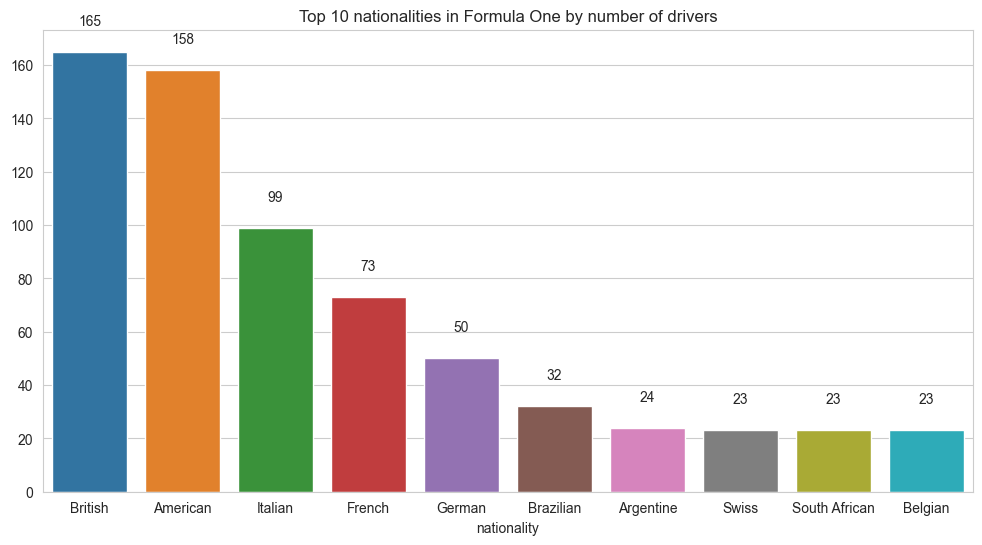

In [5]:
x_values = top_10_nationalities.index
y_values = top_10_nationalities.values

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=x_values, y=y_values, ax=ax)
ax.set_title("Top 10 nationalities in Formula One by number of drivers")

for i, v in enumerate(y_values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.show()

### Wykres kołowy | Najbardziej utytułowane zespoły w historii pod względem wygranych wyścigów (miejsc na podium)

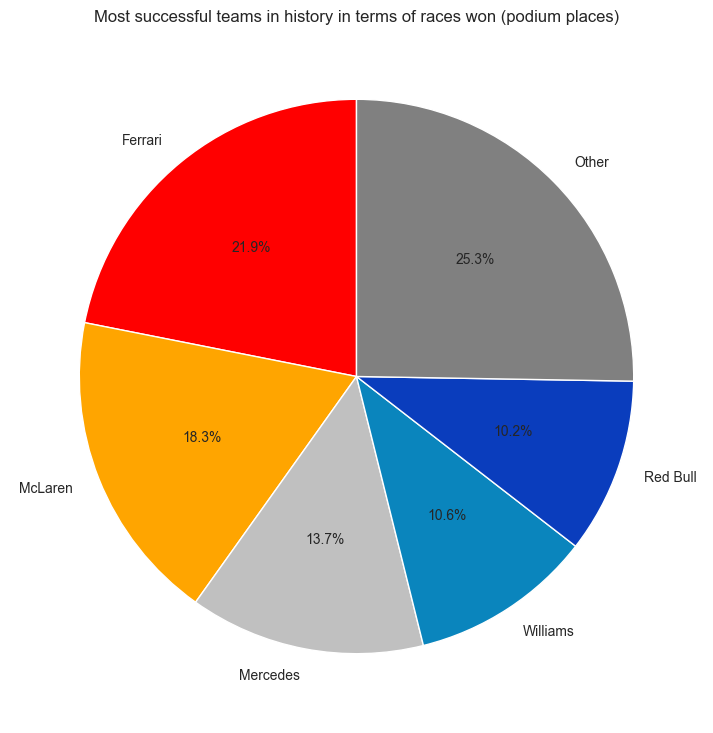

In [6]:
constructor_wins = constructor_standings[constructor_standings['wins'] != 0]
data = pd.merge(constructors, constructor_wins, on='constructorId')

win_counts = data.groupby('name')['wins'].sum()

top_constructors = win_counts.nlargest(5).index.tolist()
win_counts_top = win_counts.loc[top_constructors]
other_wins = win_counts.sum() - win_counts_top.sum()
win_counts_top['Other'] = other_wins
top_constructors.append('Other')

color_dict = {'Ferrari': 'red', 'McLaren': 'orange', 'Mercedes': 'silver', 'Williams': '#0a85bd',
                'Red Bull': '#0a3dbd', 'Brabham': '#ffce4b', 'Team Lotus': 'green', 'Renault': 'yellow', 'BRM': '#cc00cc', 'Tyrrell': 'pink', 'Other': 'gray'}

colors = win_counts_top.index.map(color_dict.get)


sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
ax.pie(win_counts_top, labels=top_constructors, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Most successful teams in history in terms of races won (podium places)')

plt.show()

### Pitstops

In [7]:
#read csv
pitstops = pd.read_csv("data/pit_stops.csv")
races = pd.read_csv("data/races.csv")
races_1950 = races.loc[races["year"] == 2023]

# display(Markdown("## Pitstops"))
# display(pitstops.head(5))

# display(Markdown("## races"))
# display(races.head(5))

display(Markdown("## races 1950"))
display(races_1950)

display(Markdown(" ---"))

# print(sorted(years:= races["year"].unique()))
race_id_year = races_1950["raceId"]
display(race_id_year)
display(Markdown(" ---"))

pitstops_in_year = pitstops[pitstops["raceId"].isin([841,848])]
display(pitstops_in_year)
# display(pitstops.loc[pitstops["raceId"]==1094])

## races 1950

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1079,1098,2023,1,3,Bahrain Grand Prix,2023-03-05,15:00:00,https://en.wikipedia.org/wiki/2023_Bahrain_Gra...,2023-03-03,11:30:00,2023-03-03,15:00:00,2023-03-04,11:30:00,2023-03-04,15:00:00,\N,\N
1080,1099,2023,2,77,Saudi Arabian Grand Prix,2023-03-19,17:00:00,https://en.wikipedia.org/wiki/2023_Saudi_Arabi...,2023-03-17,13:30:00,2023-03-17,17:00:00,2023-03-18,13:30:00,2023-03-18,17:00:00,\N,\N
1081,1100,2023,3,1,Australian Grand Prix,2023-04-02,05:00:00,https://en.wikipedia.org/wiki/2023_Australian_...,2023-03-31,01:30:00,2023-03-31,05:00:00,2023-04-01,01:30:00,2023-04-01,05:00:00,\N,\N
1082,1101,2023,4,73,Azerbaijan Grand Prix,2023-04-30,11:00:00,https://en.wikipedia.org/wiki/2023_Azerbaijan_...,2023-04-28,09:30:00,2023-04-29,09:30:00,\N,\N,2023-04-28,13:00:00,2023-04-29,13:30:00
1083,1102,2023,5,79,Miami Grand Prix,2023-05-07,19:30:00,https://en.wikipedia.org/wiki/2023_Miami_Grand...,2023-05-05,17:30:00,2023-05-05,21:00:00,2023-05-06,16:30:00,2023-05-06,20:00:00,\N,\N
1084,1103,2023,6,21,Emilia Romagna Grand Prix,2023-05-21,13:00:00,https://en.wikipedia.org/wiki/2023_Emilia_Roma...,2023-05-19,11:30:00,2023-05-19,15:00:00,2023-05-20,10:30:00,2023-05-20,14:00:00,\N,\N
1085,1104,2023,7,6,Monaco Grand Prix,2023-05-28,13:00:00,https://en.wikipedia.org/wiki/2023_Monaco_Gran...,2023-05-26,11:30:00,2023-05-26,15:00:00,2023-05-27,10:30:00,2023-05-27,14:00:00,\N,\N
1086,1105,2023,8,4,Spanish Grand Prix,2023-06-04,13:00:00,https://en.wikipedia.org/wiki/2023_Spanish_Gra...,2023-06-02,11:30:00,2023-06-02,15:00:00,2023-06-03,10:30:00,2023-06-03,14:00:00,\N,\N
1087,1106,2023,9,7,Canadian Grand Prix,2023-06-18,18:00:00,https://en.wikipedia.org/wiki/2023_Canadian_Gr...,2023-06-16,17:30:00,2023-06-16,21:00:00,2023-06-17,16:30:00,2023-06-17,20:00:00,\N,\N
1088,1107,2023,10,70,Austrian Grand Prix,2023-07-02,13:00:00,https://en.wikipedia.org/wiki/2023_Austrian_Gr...,2023-06-30,11:30:00,2023-07-01,10:30:00,\N,\N,2023-06-30,15:00:00,2023-07-01,14:30:00


 ---

1079    1098
1080    1099
1081    1100
1082    1101
1083    1102
1084    1103
1085    1104
1086    1105
1087    1106
1088    1107
1089    1108
1090    1109
1091    1110
1092    1111
1093    1112
1094    1113
1095    1114
1096    1115
1097    1116
1098    1117
1099    1118
1100    1119
1101    1120
Name: raceId, dtype: int64

 ---

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
499,848,67,3,45,15:24:07,20.995,20995
500,848,20,3,47,15:25:39,20.331,20331
501,848,39,3,44,15:26:13,26.059,26059
502,848,13,3,48,15:28:09,20.404,20404
